<a href="https://colab.research.google.com/github/ITU-Business-Analytics-Team/Business_Analytics_for_Professionals/blob/main/Part%20I%20%3A%20Methods%20%26%20Technologies%20for%20Business%20Analytics/Chapter%203%3A%20Prediction%20Modelling/3_2_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prediction Modelling**
## Logistic Regression

### **Classifying Breast Cancer Tumors**

In this exercise, there is a dataset that containts breast biopsy results for 569 tumors. For each tumor 30 numeric value is measured including:

- radius (mean of distances from center to points on the perimeter)
- texture (standard deviation of gray-scale values)
- perimeter
- area
- smoothness (local variation in radius lengths)
- compactness (perimeter^2 / area - 1.0)
- concavity (severity of concave portions of the contour)
- concave points (number of concave portions of the contour)
- symmetry
- fractal dimension ("coastline approximation" - 1)

The class labels are Malignant ('M') indicating a dangerous tumor vs Benign ('B') indicating a non-cancerous tissue. A Logistic Regression model is trained to classify tumors either malignant or benign when biopsy measurements are provided.


```sklearn.datasets``` library have built-in functions to import many of the well-known datasets. The wisconsin breast cancer dataset can be imported by using one of those built-in functions: 

In [18]:
import pandas as pd
import numpy as np

In [19]:
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()

All datasets imported via ```sklearn.datasets``` comes as a dictionary with 7 keys:

In [20]:
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

These keys carry the following information:
- **data**: Contains the data for all features ($X$) as a numpy matrix. Each column corresponds to one feature.
- **target**: Contains the data for the target variable ($y$) a numpy matrix/array
- **frame**: Contains all data as a pandas dataframe. Created only if ```as_frame=True```. You will have the information form "data", "target", "target_names" and "feature_names" keys in a single dataframe.
- **target_names**: The names of target classes
- **DESCR**: A detailed description of the dataset.
- **feature_names**: Names of each feature as a list
- **filename**: The path to the location of the data

Let's print the description of the data:

In [21]:
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [22]:
#print(dataset['DESCR'])

Let's work with the pandas dataframe and print first 5 rows to see the data:

In [23]:
num_benign = sum(dataset.target==1)
num_malignant = sum(dataset.target == 0)

print("Number of malignant tumors:", num_malignant)
print("Number of benign tumors:", num_benign)

Number of malignant tumors: 212
Number of benign tumors: 357


- It can be seen that malignant tumors are marked to be 0 and benign tumors are marked with value 1 in the target column. By using the code above, number of malignant tumors is 212 adn number of benign tumors is 357. This is consistent with the information given in the DESCR.

In [24]:
X=df
y= pd.DataFrame(dataset.target)

In [25]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


- Now y dataframe has the target data and X has the all other information. Let's go ahead and check the performance of Logistic Regression model on this dataset. 
- 10-fold cross validation will be performed in which the whole data divided into 10 subsets. 
    - Then model is trained with 9 of those subsets and tested with the remaining subset. 
    - This process is repeated 10 times for each the test set is changed
    - This means 10 models are trained and get 10 test results
    - Average of these results will give us a better understanding about the performance
-  ```sklearn.model_selection.cross_val_score``` can be used for running a cross validation
- Logistic regression estimator of sklearn can be found in ```sklearn.linear_model.LogisticRegression```

In [27]:
#import required functions
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

#create the estimator. increased the max_iter to 5000 so that the optimal result is converged.
#Exercise: Play with max_iter parameter to see if it affects the results
lr = LogisticRegression(max_iter =5000)

#call cross_val_score with cv=10 for 10-fold cross validation
scores = cross_val_score(lr,X,y.values.ravel(),cv=10)

In [28]:
print("Accuracy scores from all 10 runs are:", scores)
print("Average accuracy:", scores.mean())

Accuracy scores from all 10 runs are: [0.98245614 0.9122807  0.92982456 0.94736842 0.98245614 0.98245614
 0.92982456 0.94736842 0.96491228 0.96428571]
Average accuracy: 0.9543233082706767


- There is a very high accuracy of 95\%. Let's see the class specific metrics. In order to look at those, the data has to be mannually divided into training and test sets.
- ```sklearn.model_selection.train_test_split``` function can be used for this purpose. 
- It has to be made sure that class proportions are conserved both in train and test sets. For this purpose, ```stratify = y``` option is used. This makes sure that proportion of values in y are preserved.
- Let's spare 30% of our data for test and use the other 70% for training the model:

In [29]:
from sklearn.model_selection import train_test_split
#Since the data is shuffled, it is good practice to set a fixed random_state
# so that the same train is obtained and test datasets when the code is rerun.
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size= 0.3, shuffle = True, stratify = y, random_state = 100)

### **Explicitly Training a Logistic Regression Model**

- In order to train a logistic regression model, ```LogisticRegression.fit(...)``` function is called. 
- ```fit(...)``` function requires both the data for explanatory variables ($X$) values and the corresponding target values ($y$) values.
- After the fit function finishes execution, LogisticRegression object will store optimal coefficient values inside.
- Predictions can be created by using ```LogisticRegression.predict(...)``` once fit function finishes the execution.
- With ```lr.coef_``` variable, the coefficients can be accessed if needed as well.


In [30]:
#train the model with the train data
lr.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=5000)

In [31]:
lr.coef_

array([[ 1.06069886,  0.23946984, -0.43204524,  0.04315079, -0.13190647,
        -0.23473666, -0.44004418, -0.23541016, -0.13004181, -0.03442833,
        -0.09865181,  0.32558527,  0.97798772, -0.15993902, -0.01771476,
        -0.00771681, -0.06252489, -0.03060906, -0.03275586, -0.00280835,
         0.09846074, -0.52166947, -0.20004424, -0.01544414, -0.21927459,
        -0.53021469, -0.89732122, -0.41422792, -0.41533116, -0.07500552]])

In [32]:
# Score functions for classifiers automatically calculates the accuracy
accuracy_train = lr.score(X_train, y_train)
accuracy_test = lr.score(X_test, y_test)

print("Accuracy on the train set:", accuracy_train)
print("Accuracy on the test set:", accuracy_test)

Accuracy on the train set: 0.9748743718592965
Accuracy on the test set: 0.9473684210526315


Usually training accuracy is expected to be higher than the test accuracy which is the case here as well. On the other hand, a big gap between train and test accuracies is not a good sign. If there is a big gap, this is an indication of overfitting. The difference observed here is an acceptable one.

Now, it is time to check class-specific metrics. ```sklearn.metrics.classification_report``` creates most of the metrics of interest at once:

In [33]:
from sklearn.metrics import classification_report
# In order to use the classification report, the model's predictions need to be obtained first:
y_pred = lr.predict(X_test)

#Create and pring the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93        64
           1       0.95      0.96      0.96       107

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



- It can be seen that both malignant (0) and benign(1) cases have high values for precision, recall and f1-score. However, it seems that our model have relatively harder time identifying malignant tumors as precision, recall and f1-score are lower accross the board when compared to benign cases. 
- In order to see the numbers of correctly and incorrectly classified cases,  the ```sklearn.metrics.confusion_matrix``` function can be used.

In [34]:
from sklearn.metrics import confusion_matrix

#create and print confusion matrix
print(confusion_matrix(y_test,y_pred))

[[ 59   5]
 [  4 103]]


- First row corresponds to actual malignant cases in the data. Our model classified 59 of them correctly as malignant and 5 of them as benign
- The second row of the matrix corresponds to actual benign cases. Our model correctly classified 103 of them as benign and 4 of them misclassified as malignant. 
- Although confusion matrix is a useful tool, it is not easy to read and digest.
- A more visual version of this is the ```sklearn.metrics.plot_confusion_matrix``` function. 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


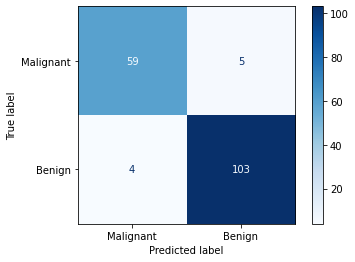

In [35]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(lr,X_test,y_test, display_labels= ["Malignant", "Benign"], cmap="Blues")

### **Getting the probabilities used for classification**
- ```LogisticRegression.predict_proba(...)``` function returns the probabilities of an instance belonging to each class 

In [36]:
import pandas as pd
#get the probabilities
probs = lr.predict_proba(X_test)

#put them into a dataframe (optional, for display purposes)
df_probs = pd.DataFrame(probs, columns=["Prob Malignant (0)", "Prob Benign (1)"])

#add predicted class as a separate column
df_probs["predicted class"] = y_pred

# check the top rows
df_probs.head()

,Prob Malignant (0),Prob Benign (1),predicted class
0,0.005582,0.994418,1
1,0.000018,0.999982,1
2,0.998648,0.001352,0
3,0.007722,0.992278,1
4,0.000052,0.999948,1


As seen above, whichever probability is higher, the instance is assigned to that class. 

### **Creating an ROC Curve and calculating AUC**

- In order to calculate calculate AUC by using scikit-learn, the probabilities above are needed. 
- ```sklearn.metrics.roc_auc_score``` is a useful tool to obtain the auc value
- On the other hand, if a figure of the ROC curve is required then ```sklearn.metrics .plot_roc_curve``` can be used. Let's see how: 

In [37]:
from sklearn.metrics import roc_auc_score, plot_roc_curve

#calculate auc
auc = roc_auc_score(y_test, probs[:,1])
print("AUC Score for Malignant is:" , auc)

AUC Score for Malignant is: 0.9902161214953271


In [38]:
from matplotlib import pyplot as plt

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


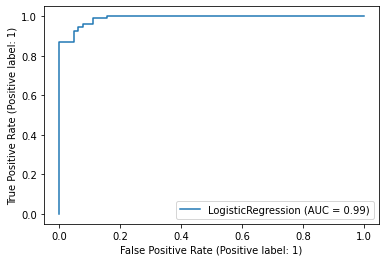

In [39]:
#plot roc curve
plot_roc_curve(lr, X_test,y_test)

plt.show()